In [1]:
from dask.distributed import Client, progress

In [2]:
client = Client(processes=False, threads_per_worker=4, n_workers=1, memory_limit='2GB')

In [3]:
client

Client Scheduler: inproc://172.31.0.15/14/1 Dashboard: http://172.31.0.15:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [4]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           29Gi       2.7Gi       1.1Gi        20Mi        25Gi        26Gi
Swap:            0B          0B          0B


In [5]:
from dask_glm.datasets import make_regression

In [6]:
X, y = make_regression(n_samples=200000, n_features=100, n_informative=5, chunksize=10000)
X

dask.array<normal, shape=(200000, 100), dtype=float64, chunksize=(10000, 100), chunktype=numpy.ndarray>

In [7]:
import dask

In [8]:
X, y = dask.persist(X, y)

In [9]:
import dask_glm.algorithms

In [10]:
b = dask_glm.algorithms.admm(X, y, max_iter=5)

In [11]:
help(dask_glm.algorithms.admm)

Help on function admm in module dask_glm.algorithms:

admm(X, y, regularizer='l1', lamduh=0.1, rho=1, over_relax=1, max_iter=250, abstol=0.0001, reltol=0.01, family=<class 'dask_glm.families.Logistic'>, **kwargs)
    Alternating Direction Method of Multipliers
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    regularizer : str or Regularizer
    lamduh : float
    rho : float
    over_relax : FLOAT
    max_iter : int
        maximum number of iterations to attempt before declaring
        failure to converge
    abstol, reltol : float
    family : Family
    
    Returns
    -------
    beta : array-like, shape (n_features,)



In [12]:
import dask_glm.families
import dask_glm.regularizers

In [13]:
help(dask_glm.algorithms.proximal_grad)

Help on function proximal_grad in module dask_glm.algorithms:

proximal_grad(X, y, regularizer='l1', lamduh=0.1, family=<class 'dask_glm.families.Logistic'>, max_iter=100, tol=1e-08, **kwargs)
    Proximal Gradient Method
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    regularizer : str or Regularizer
    lamduh : float
    max_iter : int
        maximum number of iterations to attempt before declaring
        failure to converge
    tol : float
        Maximum allowed change from prior iteration required to
        declare convergence
    family : Family
    
    Returns
    -------
    beta : array-like, shape (n_features,)



### Solving using the Proximal Gradient Method

Using an ElasticNet regularizer and Poisson family of distributions.

In [14]:
family = dask_glm.families.Poisson()
regularizer = dask_glm.regularizers.ElasticNet()

b = dask_glm.algorithms.proximal_grad(
    X, y,
    max_iter=5,
    family=family,
    regularizer=regularizer,
)

/opt/conda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


/opt/conda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

(100,)


([<matplotlib.lines.Line2D at 0x7f0492527290>], None)

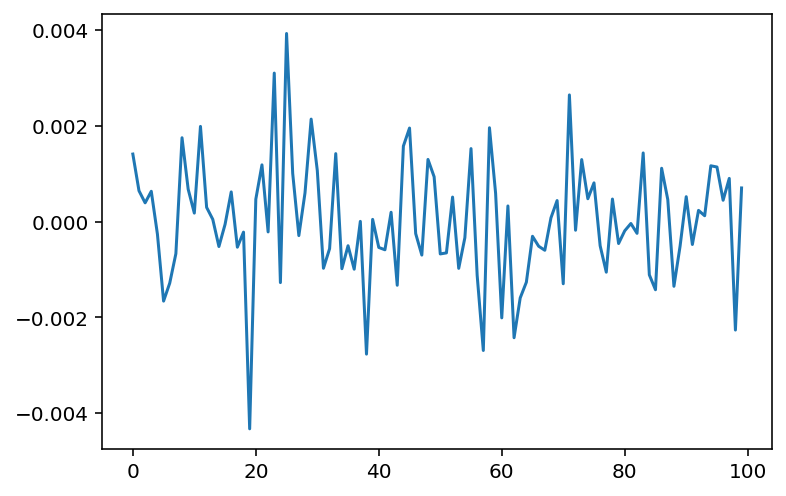

In [16]:
plt.plot(b), print(b.shape)